In [25]:
#load all necessary libraries
import pandas as pd 
import numpy as np 
import scipy as scp
import seaborn as sns
import random
import sklearn
#import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

#df_test = pd.read_spss('data/newdata/مهندسی.sav')
df_test = pd.read_excel('data/data_w_origin/GHOMOYAT.xlsx')
print(df_test.shape)

(15363, 19)


,Danshkadeh,Sen,Maghtah,Type,Moadel,Meliyat,Vaziyat Tahol,Farzandan,Sal,Komak Mali,Jensiyat,Eteghal,Enseraf,Hazf,Morakhasi,Tagher Reshteh,Mehman,Mantagheh,GDP
0,1,"<nobr dir=""ltr"">1380/01/19</nobr>",0,0,14.00,1,1,0,6,1,1,0,0,0,0,0,0,3,5
1,1,"<nobr dir=""ltr"">1380/08/03</nobr>",0,0,14.00,1,1,0,6,1,1,0,0,0,0,0,0,5,2
2,1,"<nobr dir=""ltr"">1380/01/01</nobr>",0,0,12.61,1,1,0,6,1,0,0,0,0,0,0,0,1,1
3,1,"<nobr dir=""ltr"">1379/08/05</nobr>",0,0,13.93,1,1,0,6,1,1,0,0,0,0,0,0,1,1
4,1,"<nobr dir=""ltr"">1381/05/06</nobr>",0,0,999.00,1,1,0,6,1,1,0,0,0,0,0,0,1,1


In [26]:
import re
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result

df_test['Sen']=df_test['Sen'].apply(lambda cw : remove_tags(cw))
#df_test.head()

def age_calc(string):
    year, month, day = string.split("/")
    year = 1401 - int(year)
    return year

df_test['Sen']=df_test['Sen'].apply(lambda cw : age_calc(cw))
df_test.head()

,Danshkadeh,Sen,Maghtah,Type,Moadel,Meliyat,Vaziyat Tahol,Farzandan,Sal,Komak Mali,Jensiyat,Eteghal,Enseraf,Hazf,Morakhasi,Tagher Reshteh,Mehman,Mantagheh,GDP
0,1,21,0,0,14.00,1,1,0,6,1,1,0,0,0,0,0,0,3,5
1,1,21,0,0,14.00,1,1,0,6,1,1,0,0,0,0,0,0,5,2
2,1,21,0,0,12.61,1,1,0,6,1,0,0,0,0,0,0,0,1,1
3,1,22,0,0,13.93,1,1,0,6,1,1,0,0,0,0,0,0,1,1
4,1,20,0,0,999.00,1,1,0,6,1,1,0,0,0,0,0,0,1,1


In [27]:
cols = ['Danshkadeh', 'Sen', 'Maghtah', 'Type', 'Moadel', 'Meliyat',
       'Vaziyat Tahol', 'Farzandan', 'Sal', 'Komak Mali', 'Jensiyat',
       'Eteghal', 'Enseraf', 'Hazf', 'Morakhasi', 'Tagher Reshteh', 'Mehman',
       'Mantagheh', 'GDP']
df_test.columns = cols
df_test.drop(['Mantagheh', 'GDP'], axis=1, inplace=True)
df_test.columns
df_test = df_test.loc[~(df_test == 999).any(axis=1)]

In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13709 entries, 0 to 15362
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Danshkadeh      13709 non-null  int64  
 1   Sen             13709 non-null  int64  
 2   Maghtah         13709 non-null  int64  
 3   Type            13709 non-null  int64  
 4   Moadel          13709 non-null  float64
 5   Meliyat         13709 non-null  int64  
 6   Vaziyat Tahol   13709 non-null  int64  
 7   Farzandan       13709 non-null  int64  
 8   Sal             13709 non-null  int64  
 9   Komak Mali      13709 non-null  int64  
 10  Jensiyat        13709 non-null  int64  
 11  Eteghal         13709 non-null  int64  
 12  Enseraf         13709 non-null  int64  
 13  Hazf            13709 non-null  int64  
 14  Morakhasi       13709 non-null  int64  
 15  Tagher Reshteh  13709 non-null  int64  
 16  Mehman          13709 non-null  int64  
dtypes: float64(1), int64(16)
memory

In [5]:
import pandas as pd

# create a sample data frame
df = pd.DataFrame({
    'Column1': ['A', 'B', 'C', 'A'],
    'Column2': ['X', 'Y', 'X', 'Z'],
    'Column3': ['Yes', 'No', 'Yes', 'Yes']
})
print(df)
# create a dictionary to map unique values to numbers
mapping_dict = {}
for col in df.columns:
    unique_values = df[col].unique()
    mapping_dict[col] = {value: i for i, value in enumerate(unique_values)}

# replace values in data frame with mapped values
df.replace(mapping_dict, inplace=True)

print(df)

  Column1 Column2 Column3
0       A       X     Yes
1       B       Y      No
2       C       X     Yes
3       A       Z     Yes
   Column1  Column2  Column3
0        0        0        0
1        1        1        1
2        2        0        0
3        0        2        0


## EDA

In [6]:
'''
# create a dictionary to map unique values to numbers
mapping_dict = {}
variables = list(set(df_test.columns) - {"ID", "Sen", "Moadel", "Farzandan", "Sal"})
for col in variables:
    unique_values = df_test[col].unique()
    mapping_dict[col] = {value: i for i, value in enumerate(unique_values)}

# replace values in data frame with mapped values
df_test.replace(mapping_dict, inplace=True)
df_test.head()
'''

'\n# create a dictionary to map unique values to numbers\nmapping_dict = {}\nvariables = list(set(df_test.columns) - {"ID", "Sen", "Moadel", "Farzandan", "Sal"})\nfor col in variables:\n    unique_values = df_test[col].unique()\n    mapping_dict[col] = {value: i for i, value in enumerate(unique_values)}\n\n# replace values in data frame with mapped values\ndf_test.replace(mapping_dict, inplace=True)\ndf_test.head()\n'

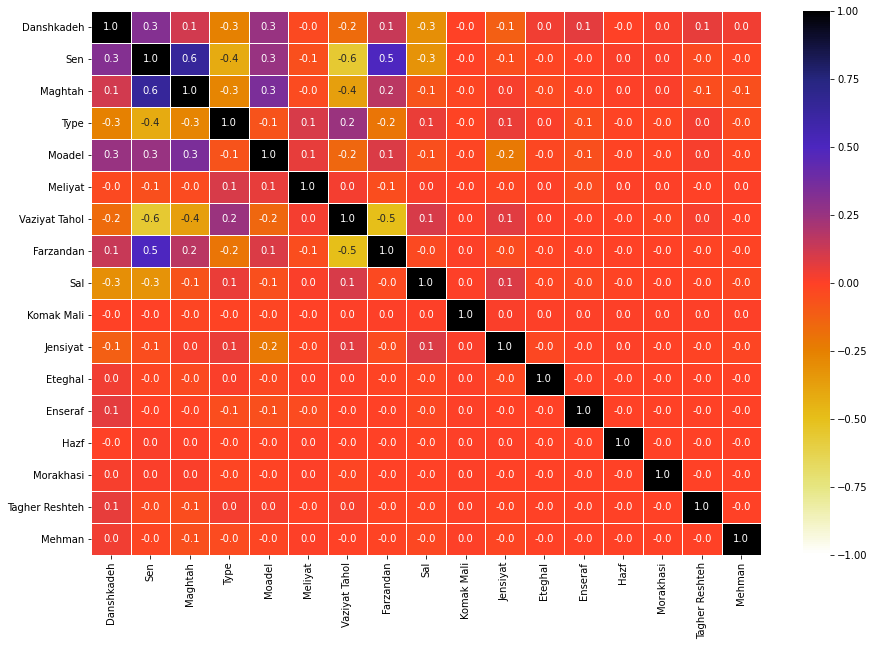

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(df_test.corr(), annot=True, linewidth=.5, vmin = -1, vmax = 1,cmap = plt.cm.CMRmap_r, fmt=".1f");

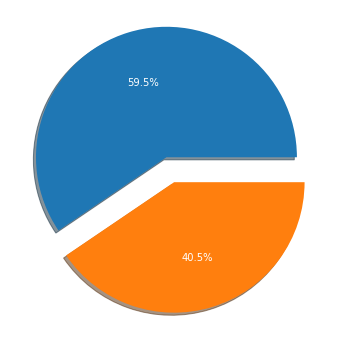

In [30]:
plt.figure(figsize=(8,6))
counts_male = df_test[df_test['Jensiyat']==1].shape[0]
counts_female = df_test[df_test['Jensiyat']==0].shape[0]
plt.pie([counts_male, counts_female], explode=[0.1,0.1], shadow=True, labels=['Male ','Female'], textprops={'color':"w"}, autopct='%4.1f%%');

In [31]:
df_test.dropna(inplace=True)
df_test.isna().sum()

Danshkadeh        0
Sen               0
Maghtah           0
Type              0
Moadel            0
Meliyat           0
Vaziyat Tahol     0
Farzandan         0
Sal               0
Komak Mali        0
Jensiyat          0
Eteghal           0
Enseraf           0
Hazf              0
Morakhasi         0
Tagher Reshteh    0
Mehman            0
dtype: int64

## Model for Remove/Change Decisions

In [ ]:
X = df_test.drop(['Leave', 'Remove', 'newClass', 'Tasmim'], axis=1) 
y = df_test['newClass']
#y=y.astype('object')

print("Columns for training:", list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)
preds = model1.predict(X_test)

#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = model1.get_params()
print(params)

#Print model parameters
#print('Intercept: \n', model1.intercept_)
#print('Coefficients: \n', model1.coef_)

#Create a confusion matrix
#y_test as first argument and the preds as second argument 
confusion_matrix(y_test, preds)

#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(y_test, preds))

#Accuracy statistics

print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

#Create classification report
class_report=classification_report(y_test, preds)
print(class_report)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X = df_test.drop(['Leave', 'Remove', 'newClass', 'Tasmim', 'ID'], axis=1) 
y = df_test['newClass']
#y=y.astype('object')

print("Columns for training:", list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

## Model for GPA

In [32]:
df_test.head(1)

,Danshkadeh,Sen,Maghtah,Type,Moadel,Meliyat,Vaziyat Tahol,Farzandan,Sal,Komak Mali,Jensiyat,Eteghal,Enseraf,Hazf,Morakhasi,Tagher Reshteh,Mehman
0,1,21,0,0,14.0,1,1,0,6,1,1,0,0,0,0,0,0


<Axes: >

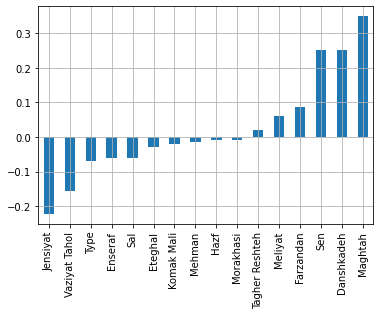

In [38]:
df_test.corr()['Moadel'].sort_values()[:-1].plot(kind='bar', grid=1)

Columns for training: ['Danshkadeh', 'Sen', 'Maghtah', 'Type', 'Meliyat', 'Vaziyat Tahol', 'Farzandan', 'Sal', 'Komak Mali', 'Jensiyat', 'Eteghal', 'Enseraf', 'Hazf', 'Morakhasi', 'Tagher Reshteh', 'Mehman']


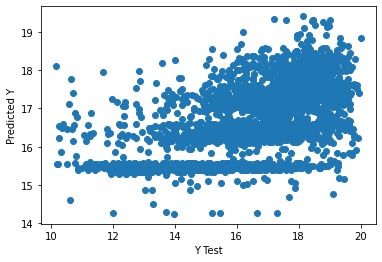

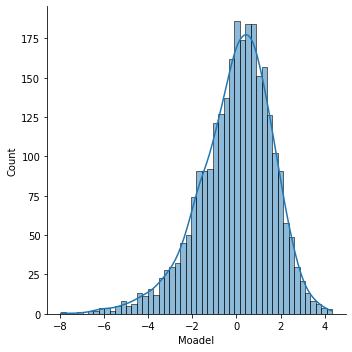

In [55]:
from sklearn.preprocessing import StandardScaler

X = df_test.drop(['Moadel'], axis=1) 
y = df_test['Moadel']
#y=y.astype('object')

print("Columns for training:", list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
#plt.plot(y_test,y_test,'r')
#plt.axis([10, 20, 12., 20])

sns.displot((y_test-predictions),bins=50, kde=True);

In [35]:
coeff_df = pd.DataFrame(lm.coef_,index=X.columns,columns=['Coefficient'])
#coeff_df

Variable: Maghtah              Importance: 0.691
Variable: Danshkadeh           Importance: 0.437
Variable: Type                 Importance: 0.142
Variable: Meliyat              Importance: 0.132
Variable: Sal                  Importance: 0.081
Variable: Tagher Reshteh       Importance: 0.048
Variable: Farzandan            Importance: 0.04
Variable: Vaziyat Tahol        Importance: 0.005
Variable: Mehman               Importance: -0.003
Variable: Komak Mali           Importance: -0.019
Variable: Hazf                 Importance: -0.021
Variable: Morakhasi            Importance: -0.023
Variable: Sen                  Importance: -0.035
Variable: Eteghal              Importance: -0.067
Variable: Enseraf              Importance: -0.121
Variable: Jensiyat             Importance: -0.375


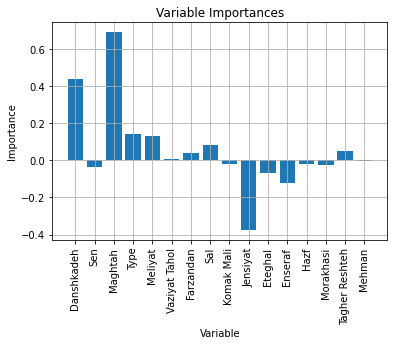

In [41]:
# Get numerical feature importances
feature_list = X.columns

importances = list(lm.coef_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
plt.grid()

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

In [65]:
coeff_df = pd.DataFrame(lm.coef_,index=X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Danshkadeh,0.437485
Sen,-0.034893
Maghtah,0.690556
Type,0.141701
Meliyat,0.131767
Vaziyat Tahol,0.005397
Farzandan,0.040486
Sal,0.080883
Komak Mali,-0.018713
Jensiyat,-0.374582


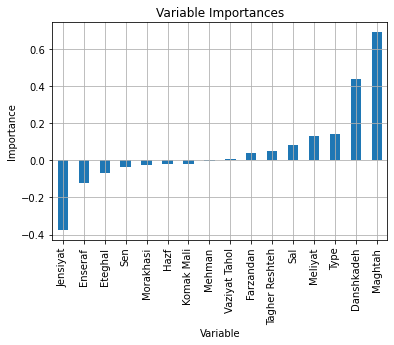

In [61]:
coeff_df['Coefficient'].sort_values()[:].plot(kind='bar', grid=1)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

In [37]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.2877228574443063
MSE: 2.776165926830711
RMSE: 1.6661830412144734


## NN for Regression

In [70]:
X_train.shape

(10967, 16)

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
#model.add(Dense(11,activation='relu'))
model.add(Dense(1))

# early stopping callback
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')

model.compile(optimizer='adam',loss='mse')
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=10, verbose=False, callbacks=[early_stopping])

<Axes: >

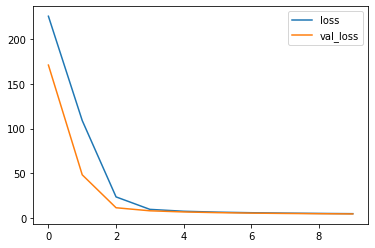

In [74]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [68]:
NN_pred = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

86/86 [==============================] - 0s 1ms/step
MAE: 1.2877228574443063
MSE: 2.776165926830711
RMSE: 1.6661830412144734


86/86 [==============================] - 0s 1ms/step


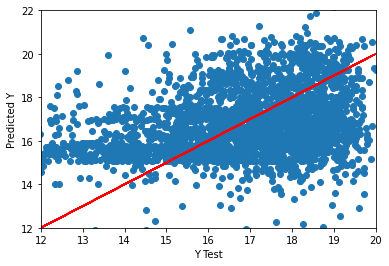

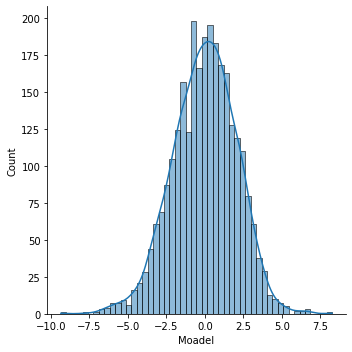

In [82]:
predictions = model.predict(X_test)
predictions = predictions.reshape(predictions.shape[0])
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.plot(y_test,y_test,'r')
plt.axis([12, 20, 12., 22])

sns.displot((y_test-predictions),bins=50, kde=True);

## Gender 

<AxesSubplot:>

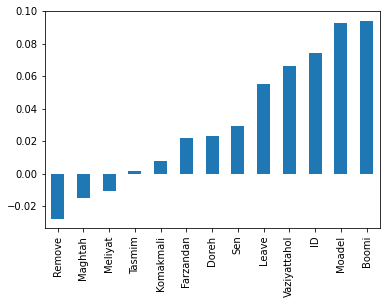

In [192]:
df_test.corr()['Jensiyat'].sort_values()[:-1].plot(kind='bar')

## Logistic Regression

In [58]:
X = df_test.drop(['Jensiyat'], axis=1) 
y = df_test['Jensiyat']
#y=y.astype('object')

print("Columns for training:", list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
preds = logmodel.predict(X_test)

#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = logmodel.get_params()
print(params)

#Print model parameters
print('Intercept: \n', logmodel.intercept_)
print('Coefficients: \n', logmodel.coef_)

#Create a confusion matrix
#y_test as first argument and the preds as second argument 
confusion_matrix(y_test, preds)

#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(y_test, preds))

#Accuracy statistics

print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

#Create classification report
class_report=classification_report(y_test, preds)
print(class_report)

print(logmodel.score(X_test, y_test))
print(logmodel.score(X_train, y_train))

Columns for training: ['Danshkadeh', 'Sen', 'Maghtah', 'Type', 'Moadel', 'Meliyat', 'Vaziyat Tahol', 'Farzandan', 'Sal', 'Komak Mali', 'Eteghal', 'Enseraf', 'Hazf', 'Morakhasi', 'Tagher Reshteh', 'Mehman', 'Mantagheh', 'GDP']
(10712, 18)
(2678, 18)
(10712,)
(2678,)
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Intercept: 
 [1.63999582]
Coefficients: 
 [[-0.05581912  0.01768271  0.39034648  0.2767897  -0.2762041   0.36709089
   0.40007305 -0.12546686  0.10264683  1.25773777 -0.3828093  -0.28923064
  -0.05809022 -0.24891339  0.12170778 -0.23873763  0.05337547  0.06618131]]
Accuracy Score: 0.6366691560866318
              precision    recall  f1-score   support

           0       0.59      0.38      0.46      1104
           1       0.65      0.82      0.73    

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## NN 

In [66]:
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
# Binary classification
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
history = model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/300
335/335 [==============================] - 1s 2ms/step - loss: 0.7729 - accuracy: 0.5535 - val_loss: 0.6731 - val_accuracy: 0.5885
Epoch 2/300
335/335 [==============================] - 0s 1ms/step - loss: 0.6576 - accuracy: 0.6175 - val_loss: 0.6554 - val_accuracy: 0.6154
Epoch 3/300
335/335 [==============================] - 0s 1ms/step - loss: 0.6509 - accuracy: 0.6245 - val_loss: 0.6555 - val_accuracy: 0.6247
Epoch 4/300
335/335 [==============================] - 1s 2ms/step - loss: 0.6491 - accuracy: 0.6316 - val_loss: 0.6541 - val_accuracy: 0.6273
Epoch 5/300
335/335 [==============================] - 0s 1ms/step - loss: 0.6450 - accuracy: 0.6330 - val_loss: 0.6486 - val_accuracy: 0.6307
Epoch 6/300
335/335 [==============================] - 0s 1ms/step - loss: 0.6427 - accuracy: 0.6376 - val_loss: 0.6493 - val_accuracy: 0.6303
Epoch 7/300
335/335 [==============================] - 0s 1ms/step - loss: 0.6406 - accuracy: 0.6397 - val_loss: 0.6457 - val_accuracy: 0.6355

377/377 [==============================] - 0s 769us/step


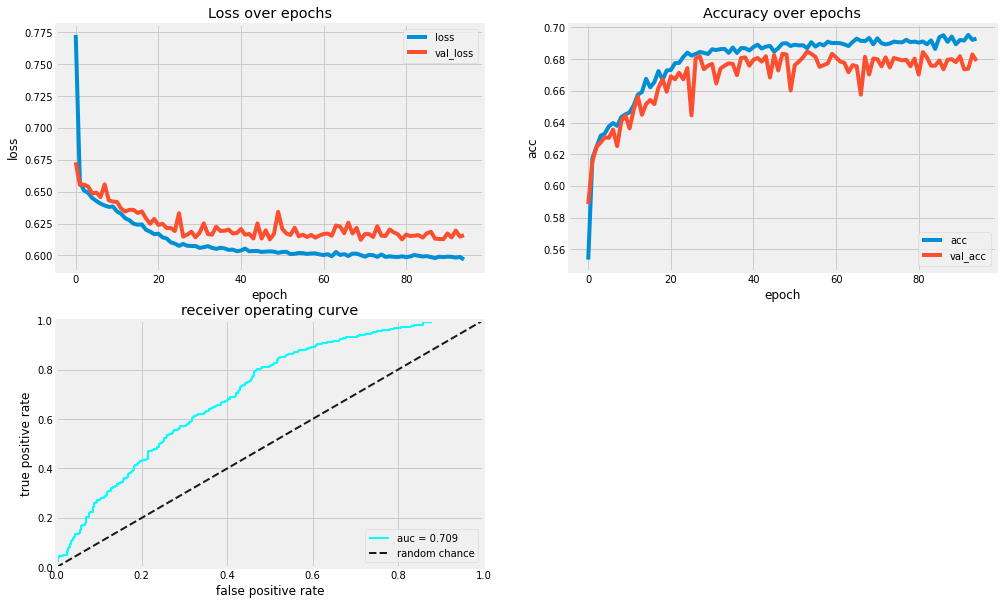

42/42 [==============================] - 0s 851us/step


In [105]:
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, confusion_matrix

%matplotlib inline
def loss_accuracy_plotter(history):
    # plot loss vs epoch
    plt.figure(figsize=(15,10))
    ax = plt.subplot(2, 2, 1)
    ax.plot(history.history['loss'], label='loss')
    ax.plot(history.history['val_loss'], label='val_loss')
    ax.legend(loc="upper right")
    ax.set_title('Loss over epochs')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')

    # plot accuracy vs epoch
    ax = plt.subplot(2, 2, 2)
    ax.plot(history.history['accuracy'], label='acc')
    ax.plot(history.history['val_accuracy'], label='val_acc')
    ax.legend(loc="lower right")
    ax.set_title('Accuracy over epochs')
    ax.set_xlabel('epoch')
    ax.set_ylabel('acc')

    # Plot ROC
    Y_predict = model.predict(X_test)
    Y_predict_train = model.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_test, Y_predict)
    roc_auc = auc(fpr, tpr)
    ax = plt.subplot(2, 2, 3)
    ax.plot(fpr, tpr, lw=2, color='cyan', label='auc = %.3f' % (roc_auc))
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
    ax.set_xlim([0, 1.0])
    ax.set_ylim([0, 1.0])
    ax.set_xlabel('false positive rate')
    ax.set_ylabel('true positive rate')
    ax.set_title('receiver operating curve')
    ax.legend(loc="lower right")
    plt.show()

loss_accuracy_plotter(history)
Y_predict = model.predict(X_test)
fpr_NN, tpr_NN, thresholds_NN = roc_curve(y_test, Y_predict)


In [54]:
#predictions = model.predict_classes(X_test)
predictions = model.predict(X_test).round()
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

84/84 [==============================] - 0s 877us/step
              precision    recall  f1-score   support

           0       0.69      0.41      0.51      1104
           1       0.68      0.87      0.76      1574

    accuracy                           0.68      2678
   macro avg       0.68      0.64      0.64      2678
weighted avg       0.68      0.68      0.66      2678

[[ 449  655]
 [ 206 1368]]


## NN Hyperparameter optimization

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
# Binary classification
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
history = model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

In [ ]:
def main():
        
    keras_pipeline = Pipeline([("scaler", StandardScaler()),
                               ("clf", keras.wrappers.scikit_learn.KerasClassifier(
                                   build_fn=make_model))
    ])
    
    param_grid = {'clf__network_layers': [(32, 32), (64, 64), (128, 128, 128)],
     'clf__batch_size': [64, 128, 256, 512],
     'clf__epochs': [50, 100, 200, 300],
     'clf__dropout_rate': [0.1, 0.01],
     'clf__optimizer': ['Nadam', 'Adam'],
     'clf__activation': ['selu', 'relu', 'tanh'],
     'clf__k_initializer': ['lecun_normal', 'normal'],
     'clf__verbose': [0]
    }
    
    rs_keras = RandomizedSearchCV(keras_pipeline,
                                  param_distributions=param_grid,
                                  cv=5, refit=True,
                                  verbose=0,
                                  n_iter=5,
                                  scoring="accuracy")
    
    history = rs_keras.fit(np.array(X_train_val),
                 np.array(Y_train_val))
    
    print('Best score obtained: {0}'.format(rs_keras.best_score_))
    print('Parameters:')
    for param, value in rs_keras.best_params_.items():
        print('\t{}: {}'.format(param, value))
    return  rs_keras  

def make_model(network_layers=[(32, 32)],
               dropout_rate=0,
               optimizer="Nadam",
               activation="selu",
               k_initializer='lecun_normal',
               n_input=NDIM,
               n_class=1):
    
    model = keras.models.Sequential()

    for index, layers in enumerate(network_layers):
        if not index:
            model.add(keras.layers.Dense(layers,
                                         input_dim=n_input,
                                         activation=activation,
                                         kernel_initializer=k_initializer))
        else:
            model.add(keras.layers.Dense(layers,
                                         kernel_initializer=k_initializer,
                                         activation=activation))
        if dropout_rate and index:
            model.add(keras.layers.AlphaDropout(dropout_rate))

    model.add(keras.layers.Dense(n_class,
                                 activation="sigmoid"))
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    #print(model.summary())
    return model

if __name__ == '__main__':
    opt_model = main()

## BDT and RF

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rfc_pred)

              precision    recall  f1-score   support

           0       0.49      0.50      0.49       541
           1       0.66      0.66      0.66       798

    accuracy                           0.59      1339
   macro avg       0.58      0.58      0.58      1339
weighted avg       0.59      0.59      0.59      1339

[[268 273]
 [274 524]]
              precision    recall  f1-score   support

           0       0.57      0.47      0.51       541
           1       0.68      0.76      0.72       798

    accuracy                           0.64      1339
   macro avg       0.62      0.61      0.61      1339
weighted avg       0.63      0.64      0.63      1339

[[254 287]
 [194 604]]


Variable: Moadel               Importance: 0.483
Variable: Sen                  Importance: 0.157
Variable: Danshkadeh           Importance: 0.091
Variable: Sal                  Importance: 0.079
Variable: GDP                  Importance: 0.055
Variable: Mantagheh            Importance: 0.047
Variable: Maghtah              Importance: 0.027
Variable: Type                 Importance: 0.018
Variable: Vaziyat Tahol        Importance: 0.015
Variable: Farzandan            Importance: 0.014
Variable: Meliyat              Importance: 0.003
Variable: Enseraf              Importance: 0.003
Variable: Morakhasi            Importance: 0.002
Variable: Komak Mali           Importance: 0.001
Variable: Eteghal              Importance: 0.001
Variable: Hazf                 Importance: 0.001
Variable: Tagher Reshteh       Importance: 0.001
Variable: Mehman               Importance: 0.001


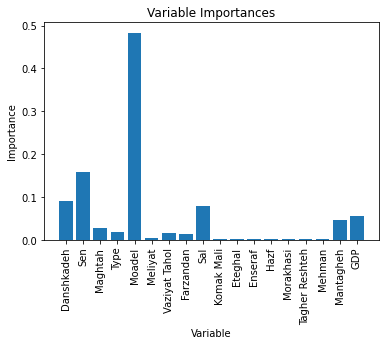

In [83]:
# Set the style
#plt.style.use('fivethirtyeight')

# Get numerical feature importances

feature_list = feature_list = list(df_test.drop(['Jensiyat'], axis=1).columns)

importances = list(rfc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

rf = RandomForestRegressor(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [90]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='accuracy', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

In [100]:
best_random = rf_random.best_estimator_
pprint(best_random.get_params())

best_random_pred = best_random.predict(X_test).round()
print(classification_report(y_test,best_random_pred))
print(confusion_matrix(y_test,best_random_pred))

fpr_rf_opt, tpr_rf_opt, thresholds_rf_opt = roc_curve(y_test, best_random_pred)

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 50,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 800,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
              precision    recall  f1-score   support

           0       0.67      0.42      0.52       541
           1       0.69      0.86      0.76       798

    accuracy                           0.68      1339
   macro avg       0.68      0.64      0.64      1339
weighted avg       0.68      0.68      0.66      1339

[[227 314]
 [112 686]]


Variable: Moadel               Importance: 0.35
Variable: Danshkadeh           Importance: 0.25
Variable: Sen                  Importance: 0.13
Variable: Sal                  Importance: 0.07
Variable: Mantagheh            Importance: 0.05
Variable: GDP                  Importance: 0.05
Variable: Maghtah              Importance: 0.04
Variable: Type                 Importance: 0.02
Variable: Vaziyat Tahol        Importance: 0.02
Variable: Farzandan            Importance: 0.01
Variable: Meliyat              Importance: 0.0
Variable: Komak Mali           Importance: 0.0
Variable: Eteghal              Importance: 0.0
Variable: Enseraf              Importance: 0.0
Variable: Hazf                 Importance: 0.0
Variable: Morakhasi            Importance: 0.0
Variable: Tagher Reshteh       Importance: 0.0
Variable: Mehman               Importance: 0.0


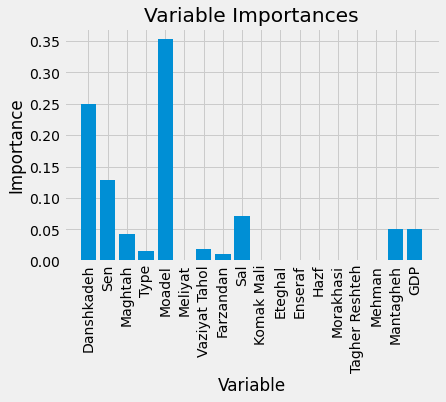

In [95]:
# Get numerical feature importances

importances = list(best_random.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

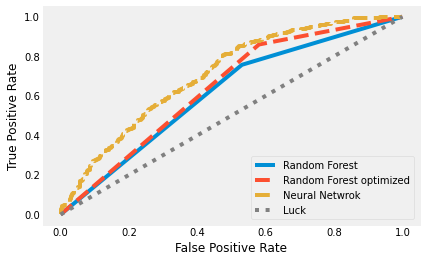

In [107]:
# plot ROC curve
plt.plot(fpr_rf, tpr_rf, label='Random Forest') # plot random forest ROC
plt.plot(fpr_rf_opt, tpr_rf_opt, linestyle='dashed', label='Random Forest optimized') # plot random forest optimized ROC
plt.plot(fpr_NN, tpr_NN, linestyle='dashed', label='Neural Netwrok') # plot neural network ROC
plt.plot([0, 1], [0, 1], linestyle='dotted', color='grey', label='Luck') # plot diagonal line to indicate luck
plt.xlabel('False Positive Rate') # x-axis label
plt.ylabel('True Positive Rate') # y-axis label
plt.grid() # add a grid to the plot
plt.legend() # add a legend

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

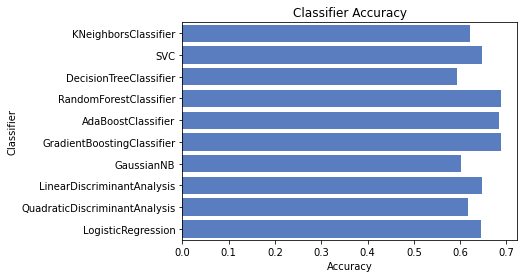

In [78]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
 	RandomForestClassifier(criterion='gini', max_depth=8, n_estimators=30, random_state=420),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

acc_dict = {}

dataset_X = df_test.drop(['Jensiyat'], axis=1).values
dataset_y = df_test['Jensiyat'].values

for train_index, test_index in sss.split(scaler.transform(dataset_X), dataset_y):
	X_train, X_test = dataset_X[train_index], dataset_X[test_index]
	y_train, y_test = dataset_y[train_index], dataset_y[test_index]
	
	for clf in classifiers:
		name = clf.__class__.__name__
		clf.fit(X_train, y_train)
		train_predictions = clf.predict(X_test)
		acc = accuracy_score(y_test, train_predictions)	
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0		# for 10 times accuracy is computed and the final accuracy is the average over 10
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b");